In [134]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [137]:
nx = 9
ny = 6
cm = None
dcoeff = None

In [146]:
def camera_calliberate(img, cm = None, dcoeff = None, nx = nx, ny = ny):
    imgpoints = []
    objpoints = []
    mesh = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    objp = np.hstack((mesh, np.zeros(shape = (nx*ny,1))))
    objp = np.array(objp, dtype = np.float32)
    retval, corners = cv2.findChessboardCorners(img,(nx,ny), None)
    if retval == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        retval, cm, dcoeff, _, _ = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], cm, dcoeff)
    
    return cm,dcoeff

In [147]:
ilist = os.listdir("./camera_cal/")

In [169]:
for im_name in ilist:
    filename = "./camera_cal/" + im_name
    img = mpimg.imread(filename)
    cm, dcoeff = camera_calliberate(img, cm, dcoeff)

In [251]:
def undistort(img, cm, dcoeff, fig_show = False):
    dest = cv2.undistort(img, cm, dcoeff)
    if fig_show == True:
        plt.figure()
        plt.imshow(dest)
    return dest

In [252]:
img = mpimg.imread("./test_images/straight_lines1.jpg")
undist = undistort(img, cm, dcoeff)

In [248]:
def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255), mode = 'mpimg'):
    # Calculate directional gradient
    # Apply threshold
    if mode == 'mpimg':
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif mode == 'cv2':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        

    if orient == 'x':
        grad = np.abs(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
    elif orient == 'y':
        grad = np.abs(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
        
    max_grad = np.max(grad)
    grad = np.uint8(255*grad/ max_grad)
    
    grad_binary = np.zeros_like(grad)
    grad_binary[(grad >= thresh[0]) & (grad <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255), mode = 'mpimg'):
    # Calculate gradient magnitude
    # Apply threshold
    if mode == 'mpimg':
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif mode == 'cv2':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    gradx = np.abs(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
    grady = np.abs(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
    
    grad = np.sqrt(gradx**2 + grady**2)
    
    max_grad = np.max(grad)
    grad = np.uint8(255*grad/ max_grad)
    
    grad_binary = np.zeros_like(grad)
    grad_binary[(grad >= mag_thresh[0]) & (grad <= mag_thresh[1])] = 1
    return grad_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2), mode = 'mpimg'):
    # Calculate gradient direction
    # Apply threshold
    if mode == 'mpimg':
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif mode == 'cv2':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    gradx = np.abs(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
    grady = np.abs(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
    
    dir_grad = np.arctan2(grady, gradx)
    
    binary_output = np.zeros_like(gray)
    binary_output[(dir_grad >= thresh[0]) & (dir_grad <= thresh[1])] = 1
    
    return binary_output

def s_threshold(img, s_thres=(0,255), mode = 'mpimg'):
    
    if mode == 'mpimg':
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif mode == 'cv2':
        hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    s = hls[:,:,2]
    binary_output = np.zeros_like(gray)
    binary_output[(s>=s_thres[0]) & (s<=s_thres[1])] = 1
    return binary_output

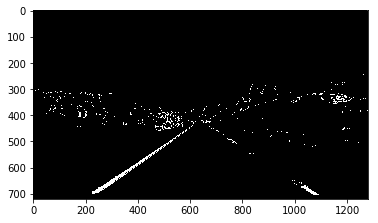

In [255]:
inp_list = os.listdir("./test_images/")

for im_name in inp_list:
    filename = "./test_images/" + im_name
    img = mpimg.imread(filename)
    undist = undistort(img,cm,dcoeff)
    s_binary = binary_conversion(undist, s_thres=(150,255))
    grad_x_binary = abs_sobel_thresh(undist, 'x', 5, (80,150))
    grad_y_binary = abs_sobel_thresh(undist, 'y', 5, (0,80))
    grad_binary = mag_thresh(undist, 5, (80, 180))
    dir_binary = dir_threshold(undist, 5, (0.7,1.3))

    #print(s_binary.shape, grad_binary.shape, grad_x_binary.shape, grad_y_binary.shape)

    plottable = np.zeros_like(s_binary)
    plottable[(s_binary == 1) | ((grad_x_binary == 1) & (grad_y_binary ==1)) | ((grad_binary ==1) & (dir_binary == 1))] = 1
    plt.figure()
    plt.imshow(plottable, cmap='gray')
    break

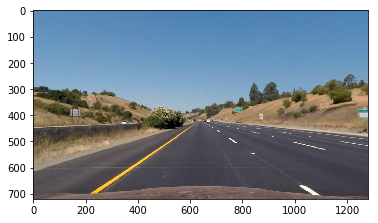

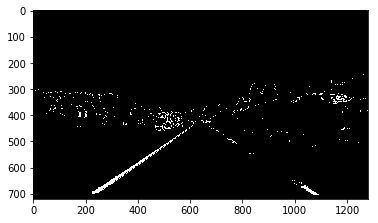

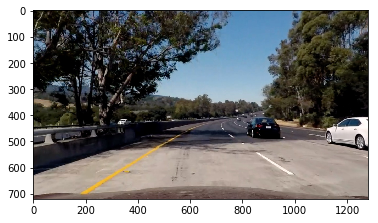

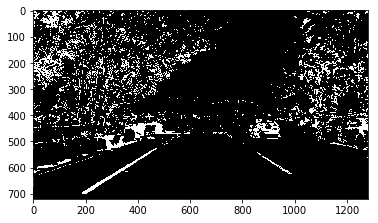

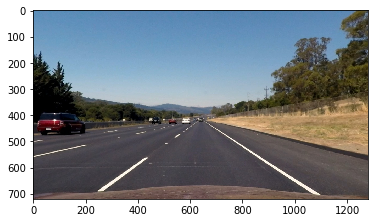

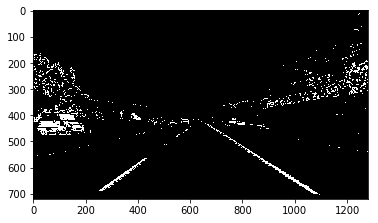

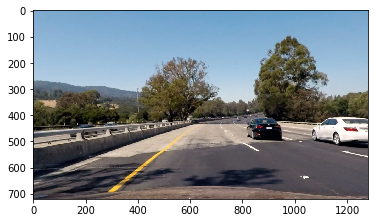

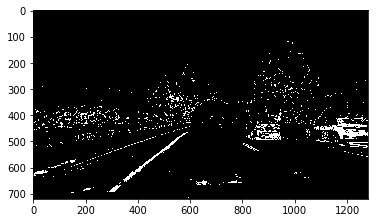

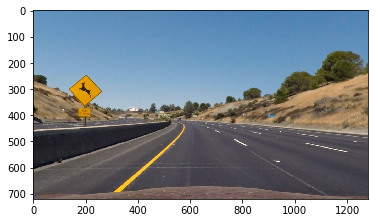

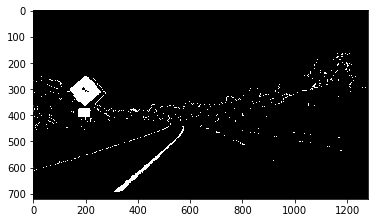

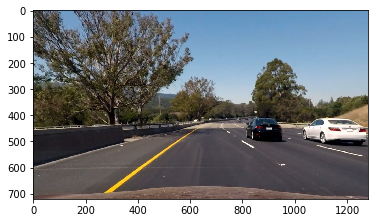

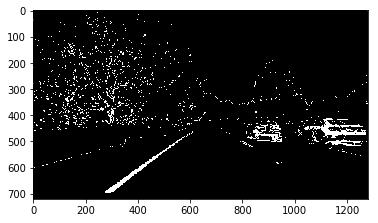

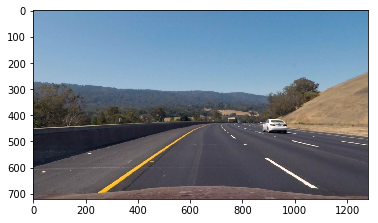

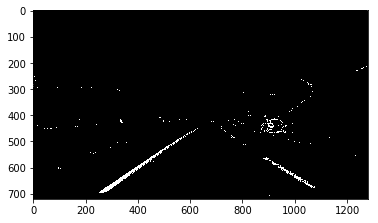

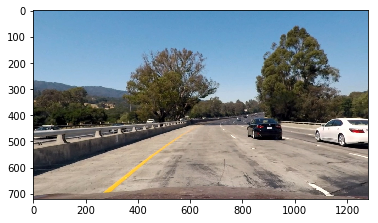

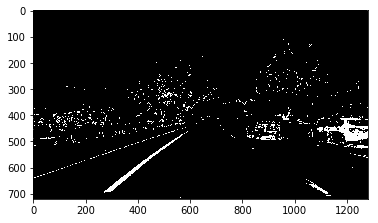

In [245]:
for im_name in inp_list:
    filename = "./test_images/" + im_name
    img = mpimg.imread(filename)
    undist = undistort(img,cm,dcoeff)
    s_binary = binary_conversion(undist, s_thres=(150,255))
    grad_x_binary = abs_sobel_thresh(undist, 'x', 5, (80,150))
    grad_y_binary = abs_sobel_thresh(undist, 'y', 5, (0,80))
    grad_binary = mag_thresh(undist, 5, (80, 180))
    dir_binary = dir_threshold(undist, 5, (0.7,1.3))

    #print(s_binary.shape, grad_binary.shape, grad_x_binary.shape, grad_y_binary.shape)

    plottable = np.zeros_like(s_binary)
    plottable[(s_binary == 1) | ((grad_x_binary == 1) & (grad_y_binary ==1)) | ((grad_binary ==1) & (dir_binary == 1))] = 1
    plt.figure()
    plt.imshow(plottable, cmap='gray')